# COVID-19 ANALYSIS

In [1]:
# lets import some useful packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

### Load dataset.


In [2]:
covid_data = pd.read_csv('F:\COVID19\covid_19_india.csv')
covid_data.tail()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
987,988,15/04/20,5:00 PM,Telengana,-,-,120,18,647
988,989,15/04/20,5:00 PM,Tripura,-,-,0,0,2
989,990,15/04/20,5:00 PM,Uttarakhand,-,-,9,0,37
990,991,15/04/20,5:00 PM,Uttar Pradesh,-,-,51,11,735
991,992,15/04/20,5:00 PM,West Bengal,-,-,37,7,213


In [3]:
covid_data.describe().head().sort_index()

,Sno,Cured,Deaths,Confirmed
25%,248.750000,0.000000,0.000000,3.000000
count,992.000000,992.000000,992.000000,992.000000
mean,496.500000,8.838710,2.882056,98.709677
min,1.000000,0.000000,0.000000,0.000000
std,286.510035,24.833902,12.240658,240.633792


In [4]:
covid_data.describe()

,Sno,Cured,Deaths,Confirmed
count,992.000000,992.000000,992.000000,992.000000
mean,496.500000,8.838710,2.882056,98.709677
std,286.510035,24.833902,12.240658,240.633792
min,1.000000,0.000000,0.000000,0.000000
25%,248.750000,0.000000,0.000000,3.000000
50%,496.500000,0.500000,0.000000,14.000000
75%,744.250000,6.000000,1.000000,64.250000
max,992.000000,259.000000,178.000000,2687.000000


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
Sno                         992 non-null int64
Date                        992 non-null object
Time                        992 non-null object
State/UnionTerritory        992 non-null object
ConfirmedIndianNational     992 non-null object
ConfirmedForeignNational    992 non-null object
Cured                       992 non-null int64
Deaths                      992 non-null int64
Confirmed                   992 non-null int64
dtypes: int64(4), object(5)
memory usage: 69.8+ KB


In [6]:
covid_data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
from pandas_profiling import ProfileReport
prof = ProfileReport(covid_data)
prof

Number of variables,9
Number of observations,992
Total Missing (%),0.0%
Total size in memory,69.8 KiB
Average record size in memory,72.1 B
Numeric,4
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


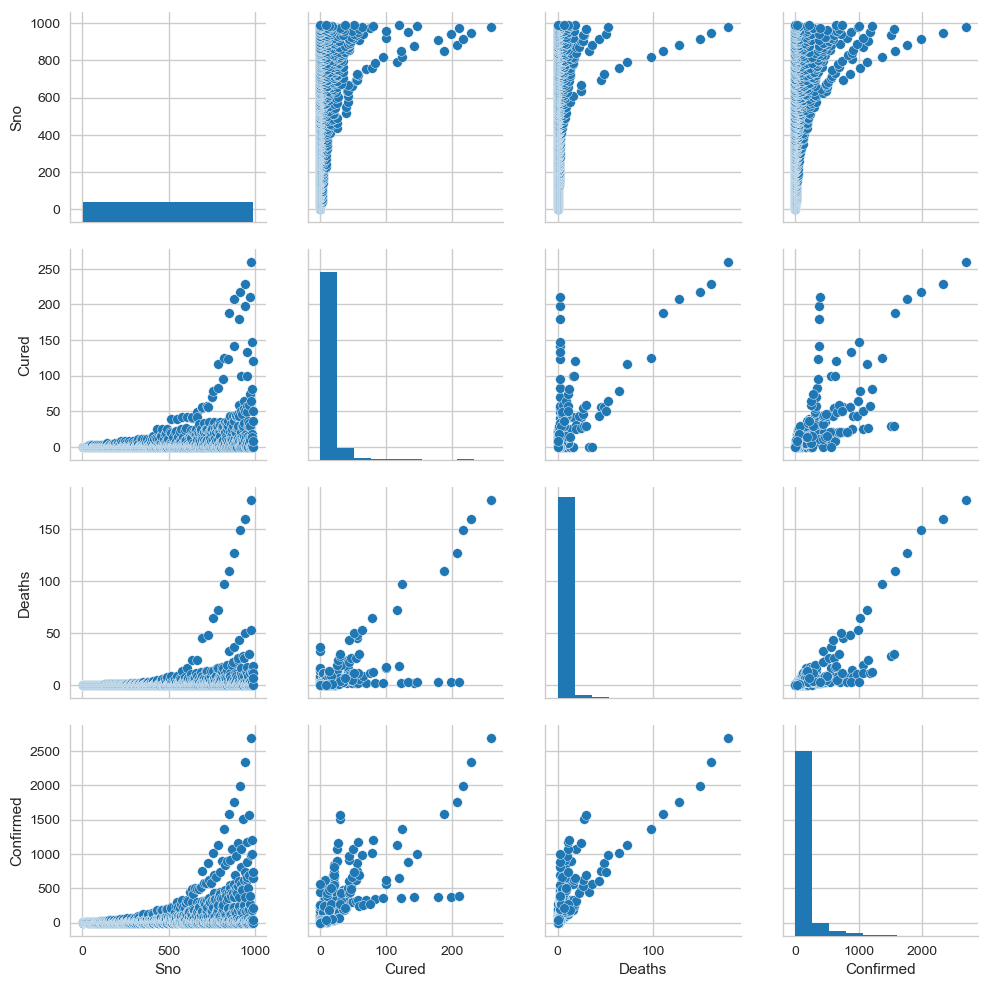

In [8]:
sns.set_style('whitegrid')
sns.pairplot(covid_data,palette="Set2")

Text(0.5,1,'missing values in the dataset')

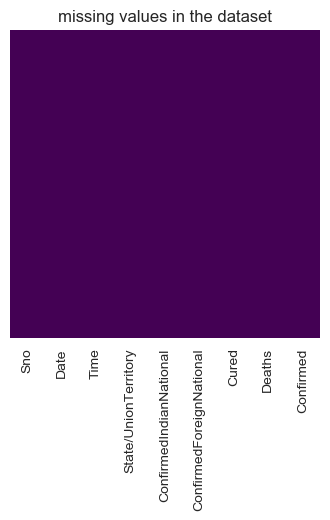

In [9]:
# let's check if any null value is present in the dataset
plt.figure(figsize=(4,4))
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('missing values in the dataset')

 there is no missing value in the dataset

In [10]:
# correlation map
co = covid_data.corr()

Text(0.5,1,'covid-19 correlation')

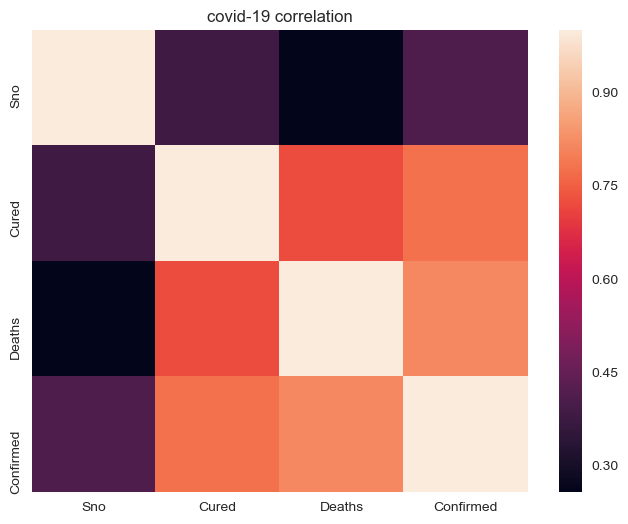

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(co)
plt.title("covid-19 correlation")

# Let us check local and foreign cases

In [12]:
cases_local = {} #dict for local cases
cases_foreign = {} #dict for foreign patients in india

for i in range(446):
    cases_local[covid_data['State/UnionTerritory'][i]] = covid_data['ConfirmedIndianNational'][i]
    cases_foreign[covid_data['State/UnionTerritory'][i]] = covid_data['ConfirmedForeignNational'][i]
print(cases_local.values())

dict_values(['168', '46', '38', '52', '54', '19', '13', '34', '55', '177', '38', '20', '14', '4', '3', '1', '15', '6', '8', '44', '3', '30', '9', '1', '1', '6', '3'])


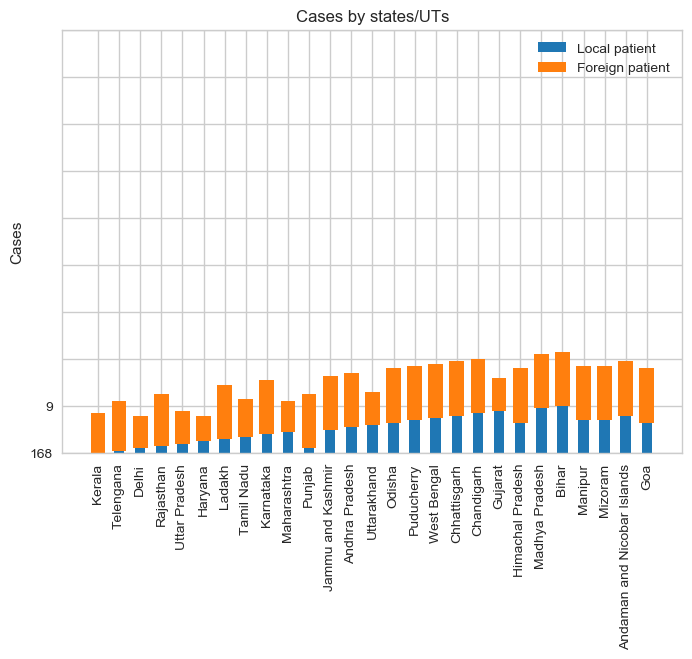

In [13]:
p1 = plt.bar(np.arange(len(cases_local)),list(cases_local.values()), 0.5)
p2 = plt.bar(np.arange(len(cases_local)), list(cases_foreign.values()), 0.7,
             bottom=list(cases_local.values()))

plt.ylabel('Cases')
plt.title('Cases by states/UTs')
plt.xticks(np.arange(len(cases_local)), cases_local.keys(),rotation='vertical')
plt.yticks(np.arange(0, 200, 20))
plt.legend((p1[0], p2[0]), ('Local patient', 'Foreign patient'))

plt.show()

In [14]:
#Now check the most cases in our states
covid_data.sample(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
153,154,15/03/20,6:00 PM,Maharashtra,32,0,0,0,32
746,747,08/04/20,5:00 PM,Delhi,-,-,21,9,576
593,594,03/04/20,6:00 PM,Chhattisgarh,-,-,3,0,9
384,385,26/03/20,6:00 PM,Puducherry,1,0,0,0,1
957,958,14/04/20,5:00 PM,Uttar Pradesh,-,-,49,5,657
947,948,14/04/20,5:00 PM,Mizoram,-,-,0,0,1
878,879,12/04/20,5:00 PM,Kerala,-,-,142,2,374
69,70,08/03/20,6:00 PM,Kerala,8,0,3,0,8
720,721,07/04/20,6:00 PM,Jammu and Kashmir,-,-,4,2,116
787,788,09/04/20,5:00 PM,Madhya Pradesh,-,-,0,16,259


In [15]:
#total no of Indians
covid_data['totalIndian'] = (covid_data['Cured']+covid_data['Deaths']+covid_data['Confirmed'])
covid_data['totalIndian'].sum()

109547

In [16]:
#Total Number of Indians State wise
covid_data.groupby('State/UnionTerritory')['totalIndian'].sum()

State/UnionTerritory
Andaman and Nicobar Islands      233
Andhra Pradesh                  4649
Arunachal Pradesh                 13
Assam                            366
Bihar                            859
Chandigarh                       418
Chhattisgarh                     389
Delhi                          12156
Goa                              146
Gujarat                         5122
Haryana                         2878
Himachal Pradesh                 393
Jammu and Kashmir               2676
Jharkhand                        160
Karnataka                       3940
Kerala                          8298
Ladakh                           554
Madhya Pradesh                  5719
Maharashtra                    22233
Manipur                           43
Meghalaya                          9
Mizoram                           22
Nagaland                           2
Nagaland#                          0
Odisha                           613
Puducherry                       110
Punjab           

# DEATHS

In [17]:
deaths = {} #dict for deaths
for i in range(len(covid_data)):
    deaths[covid_data['State/UnionTerritory'][i]] = int(covid_data['Deaths'][i])
    
print(deaths.values())


dict_values([3, 18, 30, 3, 11, 3, 0, 12, 11, 178, 13, 4, 9, 0, 1, 0, 7, 0, 0, 30, 1, 53, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0])


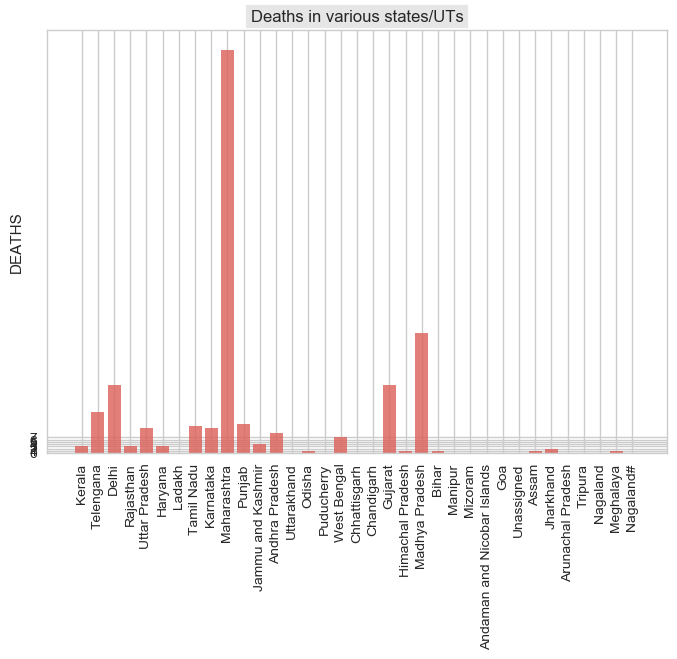

In [18]:
sns.set_palette("hls")
horz = np.arange(len(deaths))
vert= list(deaths.values())
plot = plt.bar(horz, vert ,alpha=0.8)
plt.ylabel('DEATHS')
plt.title('Deaths in various states/UTs',bbox={'facecolor':'0.9', 'pad':3})
plt.yticks(np.arange(0, 8, 1))
plt.xticks(horz, deaths.keys(),rotation='vertical')
plt.show()


In [19]:
# same plot using iplot
plt.figure(figsize=(6,6))
covid_data.iplot(kind= 'bar', x= 'State/UnionTerritory' , y= 'Deaths')

<Figure size 600x600 with 0 Axes>

# CURED CASES

In [20]:
cured_per_cases = {}  #percentage of cured per confirmed cases
for i in range(len(covid_data)):
    cured_per_cases[covid_data['State/UnionTerritory'][i]] = (covid_data['Cured'][i] / (covid_data['Confirmed'][i]))*100
(cured_per_cases)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in longlong_scalars



{'Kerala': 54.52196382428941,
 'Telengana': 18.547140649149924,
 'Delhi': 1.9218449711723256,
 'Rajasthan': 14.626865671641792,
 'Uttar Pradesh': 6.938775510204081,
 'Haryana': 17.08542713567839,
 'Ladakh': 58.82352941176471,
 'Tamil Nadu': 6.7275747508305646,
 'Karnataka': 27.075812274368232,
 'Maharashtra': 9.63900260513584,
 'Punjab': 7.526881720430108,
 'Jammu and Kashmir': 10.79136690647482,
 'Andhra Pradesh': 3.180914512922465,
 'Uttarakhand': 24.324324324324326,
 'Odisha': 30.0,
 'Puducherry': 14.285714285714285,
 'West Bengal': 17.370892018779344,
 'Chhattisgarh': 39.39393939393939,
 'Chandigarh': 33.33333333333333,
 'Gujarat': 8.489208633093526,
 'Himachal Pradesh': 39.39393939393939,
 'Madhya Pradesh': 6.484295845997974,
 'Bihar': 41.42857142857143,
 'Manipur': 50.0,
 'Mizoram': 0.0,
 'Andaman and Nicobar Islands': 90.9090909090909,
 'Goa': 71.42857142857143,
 'Unassigned': 0.0,
 'Assam': 0.0,
 'Jharkhand': 0.0,
 'Arunachal Pradesh': 0.0,
 'Tripura': 0.0,
 'Nagaland': 0.0,
 '

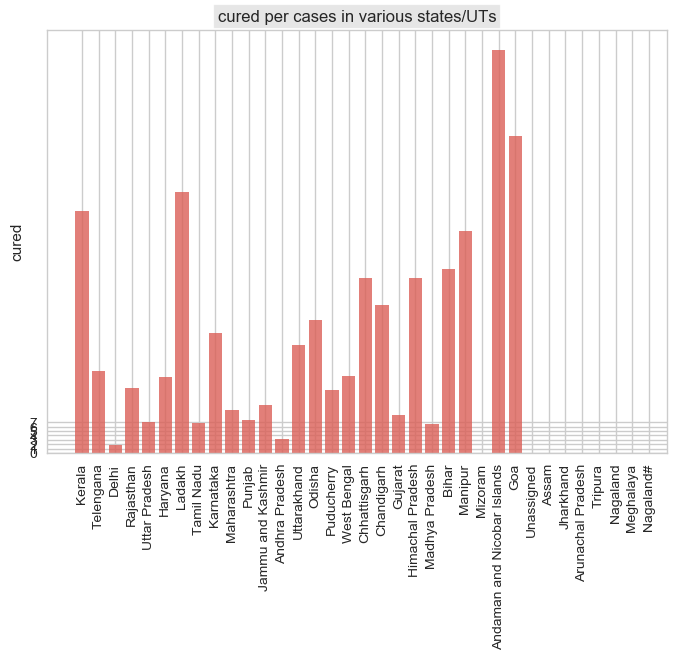

In [21]:
horz = np.arange(len(cured_per_cases))
vert= list(cured_per_cases.values())
plot = plt.bar(horz, vert ,alpha=0.8)
plt.ylabel('cured')
plt.title('cured per cases in various states/UTs',bbox={'facecolor':'0.9', 'pad':3})
plt.yticks(np.arange(0, 8, 1))
plt.xticks(horz, cured_per_cases.keys(),rotation=90)
plt.show()

In [22]:
plt.figure(figsize=(6,6))

covid_data.iplot(kind= 'scatter', x= 'State/UnionTerritory' , y= 'Deaths',mode = 'markers', 
                 size= 8,title='cured per cases in various states/UTs', xTitle='States/ UTs', yTitle='cured')

<Figure size 600x600 with 0 Axes>

# Age Group details

In [23]:
ageGroup = pd.read_csv('F:\COVID19\AgeGroupDetails.csv')
ageGroup.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [24]:
ageGroup.columns

Index(['Sno', 'AgeGroup', 'TotalCases', 'Percentage'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Total Cases')

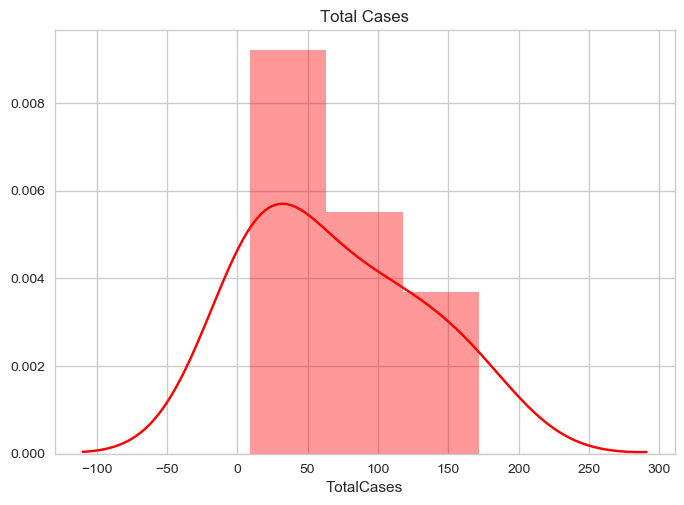

In [25]:
#Consider a plot showing  AgeGroudp vs Total Cases
sns.distplot( ageGroup['TotalCases'],color= 'red')
plt.title('Total Cases')

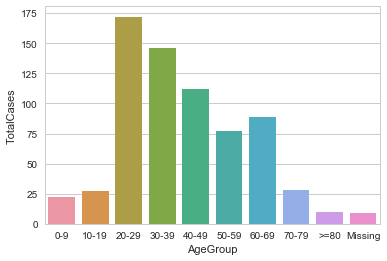

In [26]:
#Create a Bar Graph depend upon AgeGroudp vs Total Cases
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="whitegrid")
ax = sns.barplot(x="AgeGroup", y="TotalCases", data=ageGroup) 

In [27]:
age_percent = {}
for i in range(len(ageGroup)):
    age_percent[ageGroup['AgeGroup'][i]] = ageGroup['Percentage'][i][0:-1]
age_percent

{'0-9': '3.18',
 '10-19': '3.90',
 '20-29': '24.86',
 '30-39': '21.10',
 '40-49': '16.18',
 '50-59': '11.13',
 '60-69': '12.86',
 '70-79': '4.05',
 '>=80': '1.45',
 'Missing': '1.30'}

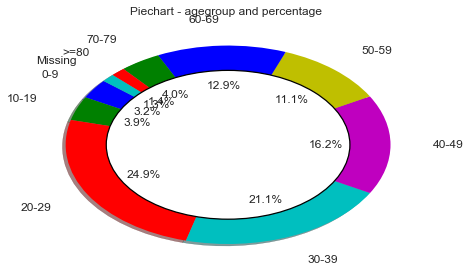

In [28]:
labels = ageGroup["AgeGroup"]
size = ageGroup["TotalCases"]
colors =['b', 'g', 'r', 'c', 'm', 'y']
  
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,labeldistance=1.26,textprops={'fontsize': 12})
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Piechart - agegroup and percentage ")
plt.tight_layout()

# Individual Details

In [29]:
IndividualDetails =  pd.read_csv('F:\COVID19\IndividualDetails.csv')
IndividualDetails.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [30]:
# gender detail
gender = IndividualDetails['gender'].value_counts().to_dict()
gender

{'M': 1588, 'F': 638, '74': 1, '36': 1}

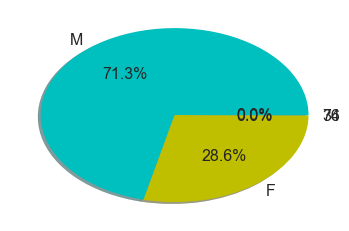

In [31]:
colors = ['c', 'y']
plt.pie(gender.values(),labels=gender.keys(),colors = colors ,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 16})
plt.show()

# ICMR Details

In [32]:
samples_tested = pd.read_csv('F:\COVID19\ICMRTestingDetails.csv')
samples_tested.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


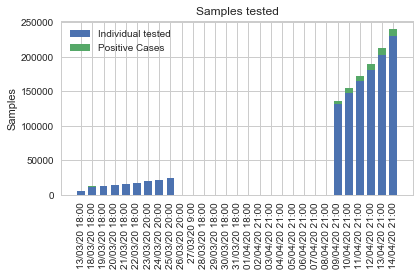

In [33]:
individual_tested = {}
positive_cases = {}
for i in range(len(samples_tested)):
    individual_tested[samples_tested['DateTime'][i]] = samples_tested['TotalIndividualsTested'][i]
    positive_cases[samples_tested['DateTime'][i]] = samples_tested['TotalPositiveCases'][i]
    
p1 = plt.bar(np.arange(len(individual_tested)),list(individual_tested.values()), 0.7)
p2 = plt.bar(np.arange(len(positive_cases)), list(positive_cases.values()), 0.7,
             bottom=list(individual_tested.values()))

plt.ylabel('Samples')
plt.title('Samples tested')
plt.xticks(np.arange(len(individual_tested)), individual_tested.keys(),rotation='vertical')
#plt.yticks(np.arange(0, 200, 20))
plt.legend((p1[0], p2[0]), ('Individual tested', 'Positive Cases'))

plt.tight_layout()